## Run it using GPU on Google colab as it will take a long time to run,upload the 009_015.jpg,009_015_out.jpg on colab,then you are good to go


In [25]:
import pandas as pd
import os
from IPython.display import display, Math, Latex
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image, ImageTk,ImageGrab
import cv2
from scipy import signal
from scipy import misc

import os
import tkinter as ttk
from tkinter import *
import tkinter.messagebox
from PIL import Image, ImageTk,ImageGrab
from tkinter.filedialog import askopenfilename
import cv2




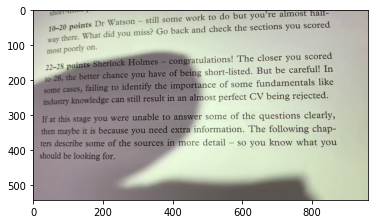

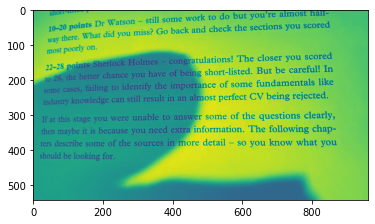

(544, 960, 3)
(163, 288)
(544, 960, 3)


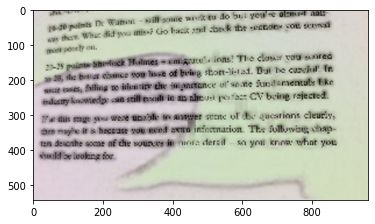

In [47]:
OG=Image.open("009_015.jpg")
x1=np.asarray(OG);
OG2=Image.open("009_015_out.jpg")
x2=np.asarray(OG2);
plt.imshow(OG)
plt.show()


hsvImage = x1
h,cr,cb=cv2.split(cv2.cvtColor(x1, cv2.COLOR_RGB2YCR_CB))

plt.imshow(h)
plt.show()

print(np.shape(x1))
h=cv2.resize(h,(int(0.3*np.shape(x1)[1]),int(0.3*np.shape(x1)[0])), interpolation = cv2.INTER_CUBIC);

def shadow(h):
  neta=0.5
  delta=1
  
  w=np.float64(np.zeros([np.shape(h)[0],np.shape(h)[1]]));
  G=np.float64(np.zeros([np.shape(h)[0],np.shape(h)[1]]));
  print(np.shape(h))
  for t in range(0,250):
      G=np.add(w,h)
      for x in range(1,np.shape(h)[0]-1):
          for y in range(1,np.shape(h)[1]-1):
              w[x][y]=max(0,w[x][y]+(np.max(G)-G[x][y])*np.exp(-1*t) + neta*(min(G[x+delta][y]-G[x][y],0)+
                                                                        min(G[x+delta][y]-G[x][y],0)+
                                                                        min(G[x+delta][y]-G[x][y],0)))
  
  h=cv2.resize(h,(np.shape(x1)[1],np.shape(x1)[0]), interpolation = cv2.INTER_CUBIC);
  G=cv2.resize(G,(np.shape(x1)[1],np.shape(x1)[0]), interpolation = cv2.INTER_CUBIC);
  w=np.float64(np.zeros([np.shape(h)[0],np.shape(h)[1]]));
  for t in range(0,15):
      G=np.add(w,G)
      for x in range(1,np.shape(h)[0]-1):
          for y in range(1,np.shape(h)[1]-1):
              w[x][y]=max(0,w[x][y]+neta*(G[x+delta][y]+G[x-delta][y]+G[x][y+delta]+G[x][y-delta]-4*G[x][y]))
              
  h=np.uint8(np.multiply(0.85*255,np.divide(h,G)))
  print(np.shape(x1))
  
  return h


h=shadow(h)

image=cv2.merge([h,cr,cb])
image = cv2.cvtColor(image,cv2.COLOR_YCR_CB2RGB)
image=Image.fromarray(np.reshape(image,np.shape(hsvImage)))
plt.imshow(image)
plt.show()

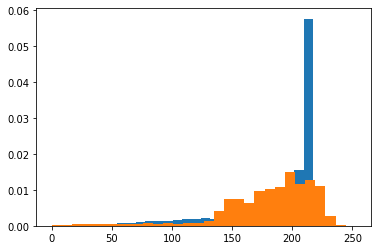

10.015043626168346


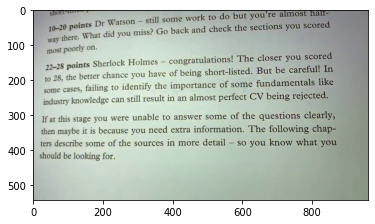

In [48]:
plt.hist(h.flatten(), density=True, bins=30)
h_og,cr,cb=cv2.split(cv2.cvtColor(x2, cv2.COLOR_RGB2YCR_CB))
h_og=np.asarray(h_og)
plt.hist(h_og.flatten(), density=True, bins=30)
plt.show()
from sklearn.metrics import mean_squared_error
print(mean_squared_error(h_og,h, squared=False))
plt.imshow(x2)
plt.show()